In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

np.random.seed(601)

# 1. 데이터 Load

In [2]:
train = pd.read_csv('data/train.csv', parse_dates=['pickup_datetime','dropoff_datetime'])
test = pd.read_csv('data/test.csv', parse_dates=['pickup_datetime'])
sample_submission = pd.read_csv('data/sample_submission.csv')

In [3]:
train.head()
test.head()
sample_submission.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


# 2. 데이터 전처리
## 2.1 EDA

In [4]:
train.shape
test.shape
sample_submission.shape

(1458644, 11)

(625134, 9)

(625134, 2)

In [5]:
train.columns
test.columns
sample_submission.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

Index(['id', 'trip_duration'], dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [86]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.440869e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,4.296544e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.231838e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2.093720e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,3.875343e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,1.240910e+03


In [88]:
train.pickup_datetime.min(), train.pickup_datetime.max()
# 월, 일, 시간, 요일 추출 

(Timestamp('2016-01-01 00:00:17'), Timestamp('2016-06-30 23:59:39'))

In [ ]:
# 운행 기간이 긴것 중 거리가 짧은것 확인 

### Missing Value

In [8]:
train.isnull().sum().sum()

0

### Value Counts

In [9]:
def value_counts(df):
    for col in df.columns:
        print(col)
        print(train[col].value_counts())
        
value_counts(train[['vendor_id']])        

vendor_id
2    780302
1    678342
Name: vendor_id, dtype: int64


In [10]:
pd.crosstab(train['vendor_id'], train['store_and_fwd_flag'], margins=True)

store_and_fwd_flag,N,Y,All
vendor_id,,,
1,670297,8045,678342
2,780302,0,780302
All,1450599,8045,1458644


### trip_duration dropoff_datetime pickup_datetime 관계 확인 -> dropoff_datetime 빼고 학습?

In [11]:
from datetime import datetime, timedelta

In [12]:
(train['trip_duration'] == (train['dropoff_datetime'] - train['pickup_datetime']).astype('timedelta64[s]')).value_counts()

True    1458644
dtype: int64

## 시각화
### 지역: 경도/위도

#### x: 위도(latitude)
#### y: 경도(longitude) 

(pickup_latitude, pickup_longitude) -> (dropoff_latitude, dropoff_longitude)

In [13]:
from tqdm import tqdm_notebook
import time
InteractiveShell.ast_node_interactivity = "none"

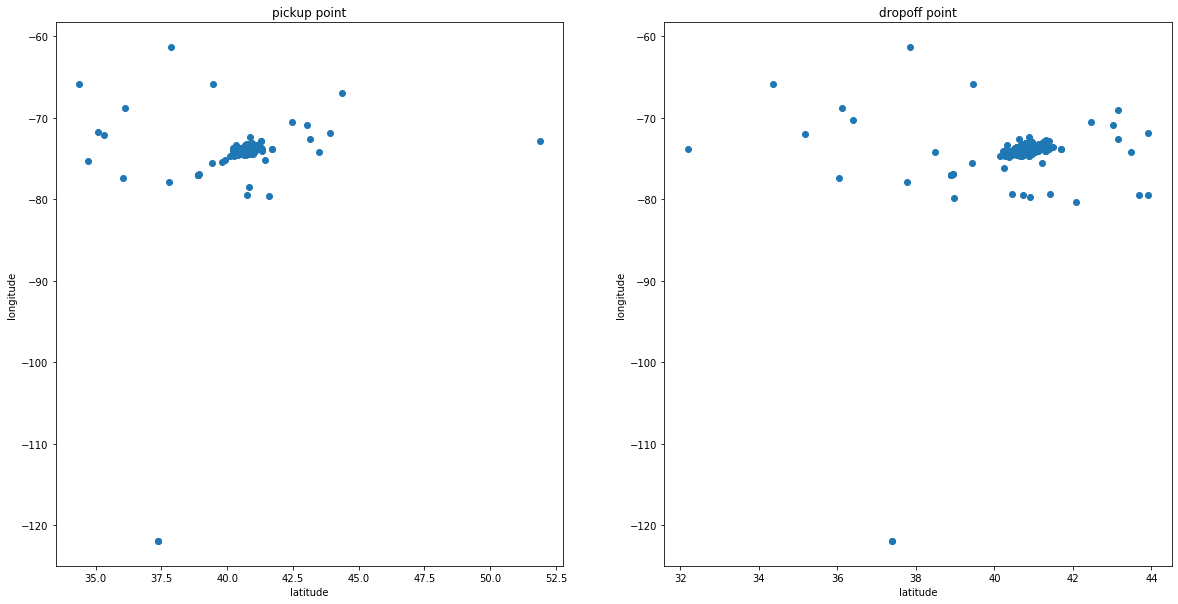

In [14]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].set_title('pickup point')
ax[0].set_xlabel('latitude')
ax[0].set_ylabel('longitude')
ax[0].scatter(train.pickup_latitude, train.pickup_longitude, marker='o')
ax[1].set_title('dropoff point')
ax[1].set_xlabel('latitude')
ax[1].set_ylabel('longitude')
ax[1].scatter(train.dropoff_latitude, train.dropoff_longitude, marker='o')
plt.show()

outlier 가져갈것인가?


time : 868.328869342804


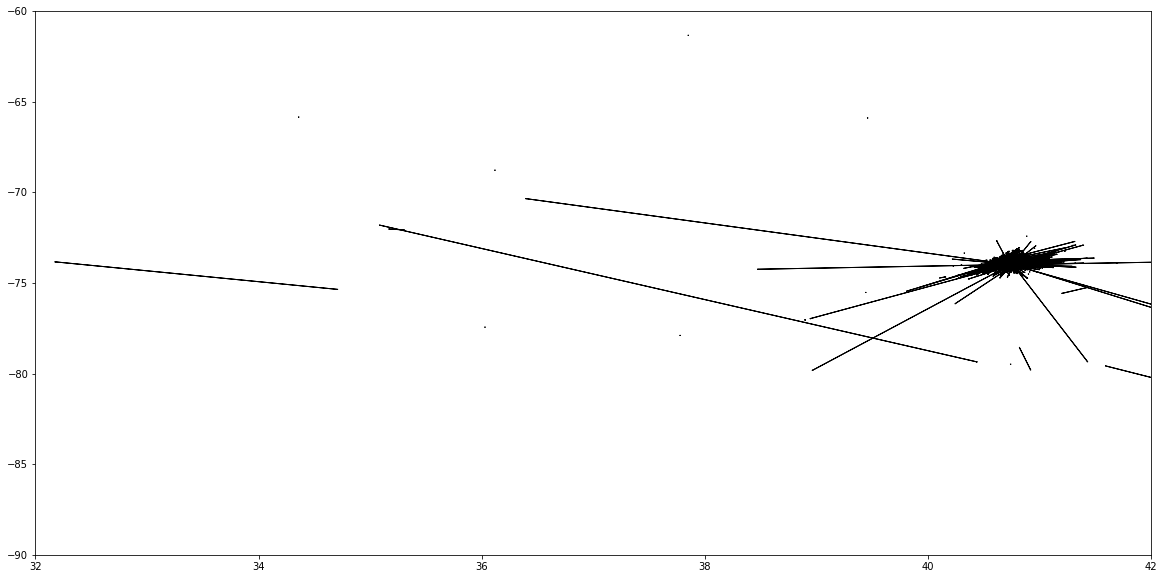

In [15]:
start = time.time()  # 시작 시간 저장

total = tqdm_notebook(range(len(train)))

fig, ax = plt.subplots(1,1, figsize=(20, 10))

for i in total:
    plt.arrow(train.pickup_latitude[i], train.pickup_longitude[i]
            , (train.dropoff_latitude[i]-train.pickup_latitude[i])
            , (train.dropoff_longitude[i]-train.pickup_longitude[i]), head_width=0.01, head_length=0.01, fc='k', ec='k')
    
ax.set_title('start -> end arrow')
ax.set_xlim(32, 42)
ax.set_ylim(-90, -60)

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

### 위도 경도로 거리 구하기 -> haversine

In [46]:
from haversine import haversine

In [52]:
train['dist'] = 0.0

In [53]:
start = time.time()  # 시작 시간 저장

total = tqdm_notebook(range(len(train)))

for i in total:
    train['dist'][i] = haversine((train.pickup_latitude[i], train.pickup_longitude[i]), (train.dropoff_latitude[i], train.dropoff_longitude[i]))
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간


time : 1815.0963213443756


In [54]:
InteractiveShell.ast_node_interactivity = "all"

In [55]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590


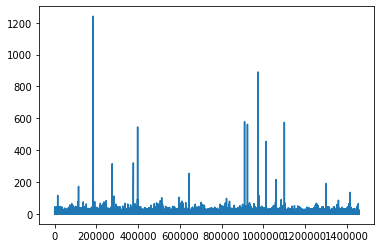

### 시간: 픽업시간 (시간 -> 요일(평일/주말(공휴일)))

In [39]:
InteractiveShell.ast_node_interactivity = "none"

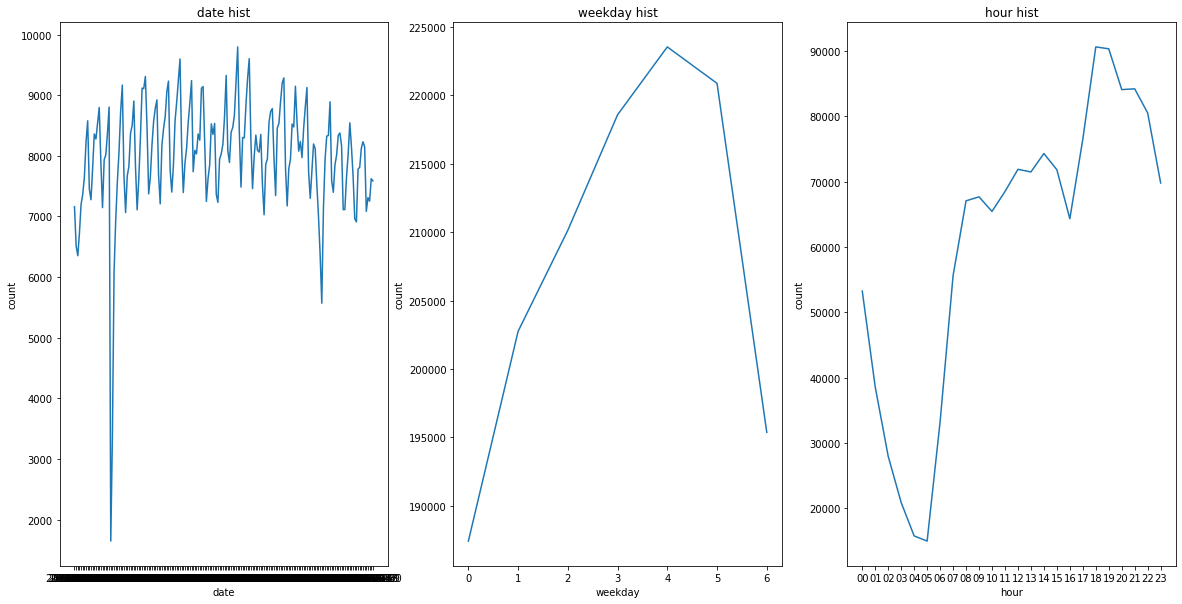

In [41]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))

# 날짜별 분포
ymd = train.pickup_datetime.dt.strftime('%Y-%m-%d').value_counts().sort_index()
ax[0].set_title('date hist')
ax[0].set_xlabel('date')
ax[0].set_ylabel('count')
ax[0].plot(ymd)

# 평일/주말 분포 # (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)
wk = train.pickup_datetime.dt.weekday.value_counts().sort_index()
ax[1].set_title('weekday hist')
ax[1].set_xlabel('weekday')
ax[1].set_ylabel('count')
ax[1].plot(wk)


# 시간별 분포 
hr = train.pickup_datetime.dt.strftime('%H').value_counts().sort_index()
ax[2].set_title('hour hist')
ax[2].set_xlabel('hour')
ax[2].set_ylabel('count')
ax[2].plot(hr)

plt.show()

1) date hist: 특정 날에 건수가 없는 날이 있음 제외 고려, 년/월/일/시 쪼개서 넣을것인가? 저 특이한 날은 제외하는게 학습에 도움이 되는가? 상관이 없는가? count 가 적으므로 dist 도 적어질테니까 없애는게 나을거 같은데... 
2) weekday hist(0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일): 요일별 편차가 존재함
3) hour hist: 새벽시간 건수가 적음 -> 시간별로 묶는 변수를 추가할까? 

In [60]:
InteractiveShell.ast_node_interactivity = "all"

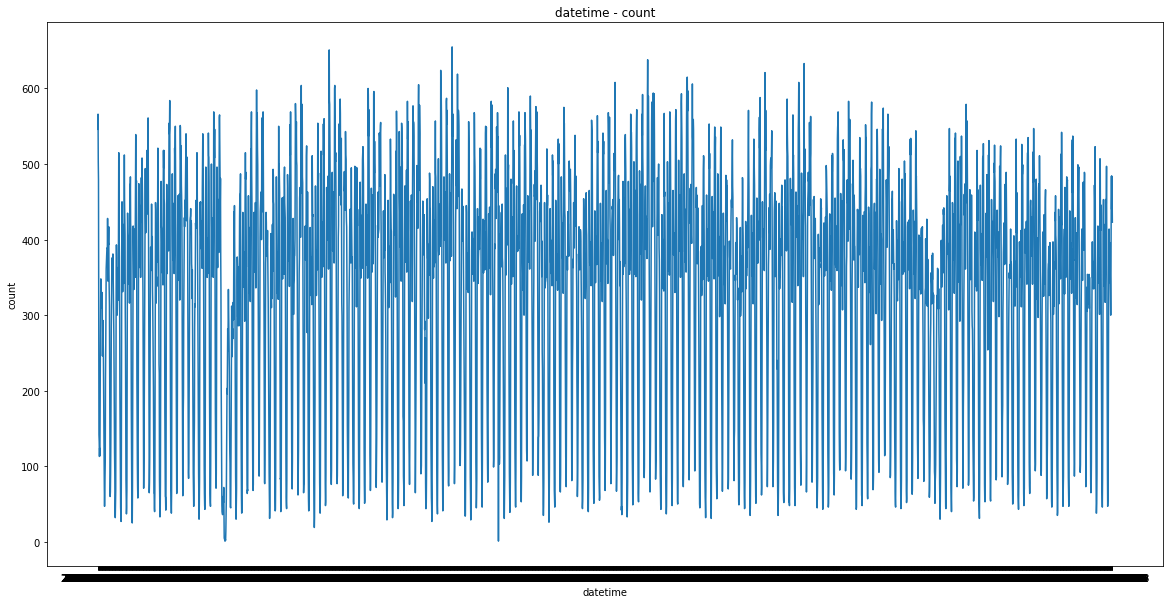

In [45]:
fig, ax = plt.subplots(1,1, figsize=(20, 10))

# 시간별 탑승 건수
datetimeCnt = train.pickup_datetime.dt.strftime('%Y-%m-%d %H').value_counts().sort_index()

ax.set_title('datetime - count')
ax.set_xlabel('datetime')
ax.set_ylabel('count')
ax.plot(datetimeCnt)

plt.show()

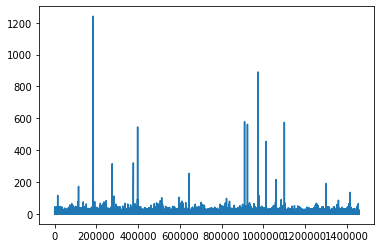

In [62]:
# 거리 분포
train.dist.plot()

In [65]:
train['dist'].groupby(train.pickup_datetime.dt.strftime('%Y-%m-%d')).sum()

pickup_datetime
2016-01-01    27366.471413
2016-01-02    23103.147845
2016-01-03    25099.991803
2016-01-04    23761.550175
2016-01-05    23695.087063
                  ...     
2016-06-26    27973.992755
2016-06-27    26311.213858
2016-06-28    23948.208448
2016-06-29    25797.185584
2016-06-30    26357.554042
Name: dist, Length: 182, dtype: float64

Text(0.5, 1.0, 'date - dist')

Text(0.5, 0, 'date')

Text(0, 0.5, 'dist')

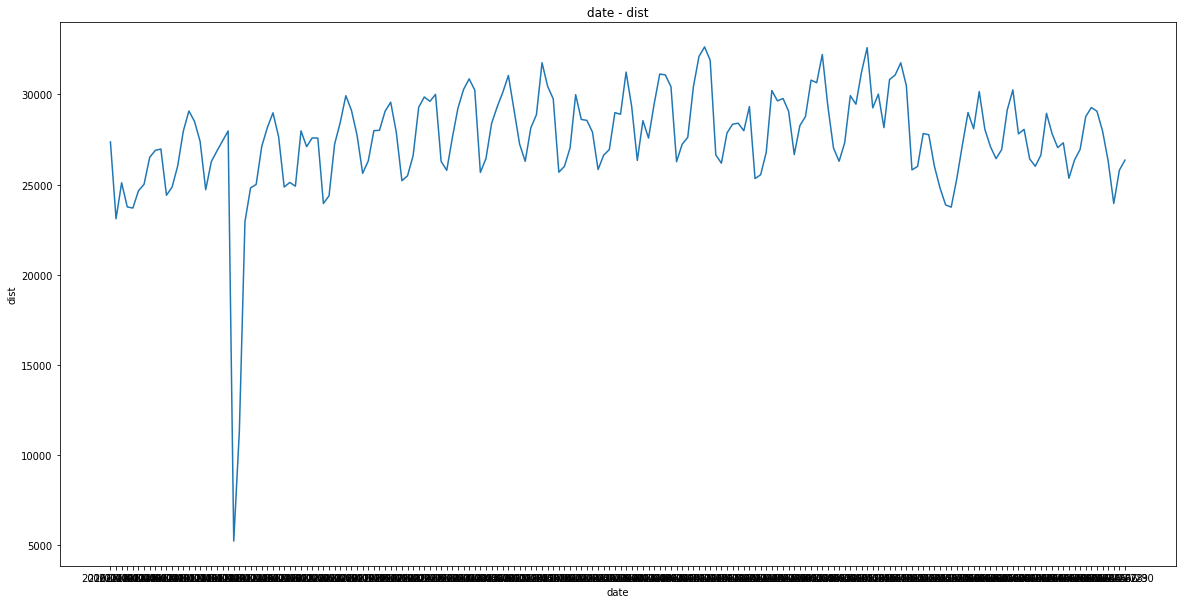

In [66]:
fig, ax = plt.subplots(1,1, figsize=(20, 10))

# 날자별 탑승 거리 
dateDist = train['dist'].groupby(train.pickup_datetime.dt.strftime('%Y-%m-%d')).sum()

ax.set_title('date - dist')
ax.set_xlabel('date')
ax.set_ylabel('dist')
ax.plot(dateDist)

plt.show()

In [71]:
dateDist[dateDist == dateDist.min()]

pickup_datetime
2016-01-23    5212.670473
Name: dist, dtype: float64

In [77]:
# '2016-01-23' 날짜 지워보기
idx = train[(train.pickup_datetime.dt.strftime('%Y-%m-%d') == '2016-01-23')].index
idx

Int64Index([    310,     593,     794,    1162,    3486,    4261,    4347,
               6582,    7433,    7827,
            ...
            1448537, 1450602, 1451216, 1451766, 1453164, 1453773, 1455015,
            1455913, 1456874, 1457224],
           dtype='int64', length=1648)

In [81]:
train_drop = train.drop(idx)
train_drop

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.225082
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.049844
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7.824617
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.092565


Text(0.5, 1.0, 'date - dist')

Text(0.5, 0, 'date')

Text(0, 0.5, 'dist')

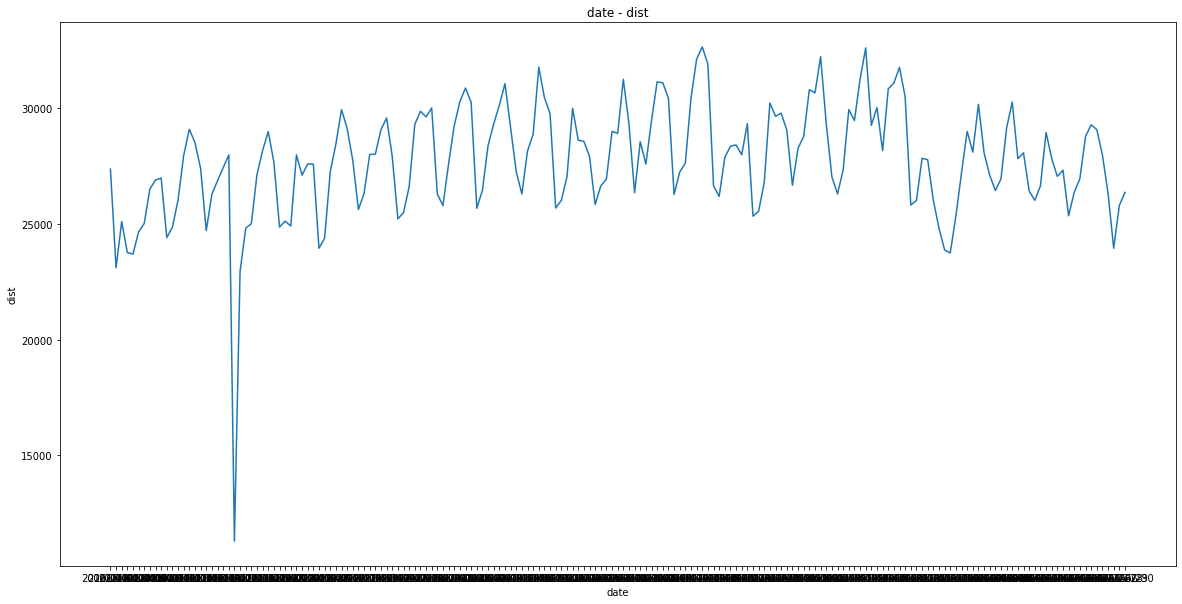

In [82]:
fig, ax = plt.subplots(1,1, figsize=(20, 10))

# 날자별 탑승 거리 
dateDist_drop = train_drop['dist'].groupby(train_drop.pickup_datetime.dt.strftime('%Y-%m-%d')).sum()

ax.set_title('date - dist')
ax.set_xlabel('date')
ax.set_ylabel('dist')
ax.plot(dateDist_drop)

plt.show()

In [83]:
dateDist_drop[dateDist_drop == dateDist_drop.min()]

pickup_datetime
2016-01-24    11302.999063
Name: dist, dtype: float64

In [84]:
# '2016-01-24' 날짜 지워보기
idx = train_drop[(train_drop.pickup_datetime.dt.strftime('%Y-%m-%d') == '2016-01-24')].index

train_drop = train_drop.drop(idx)
train_drop

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.225082
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.049844
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7.824617
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.092565


Text(0.5, 1.0, 'date - dist')

Text(0.5, 0, 'date')

Text(0, 0.5, 'dist')

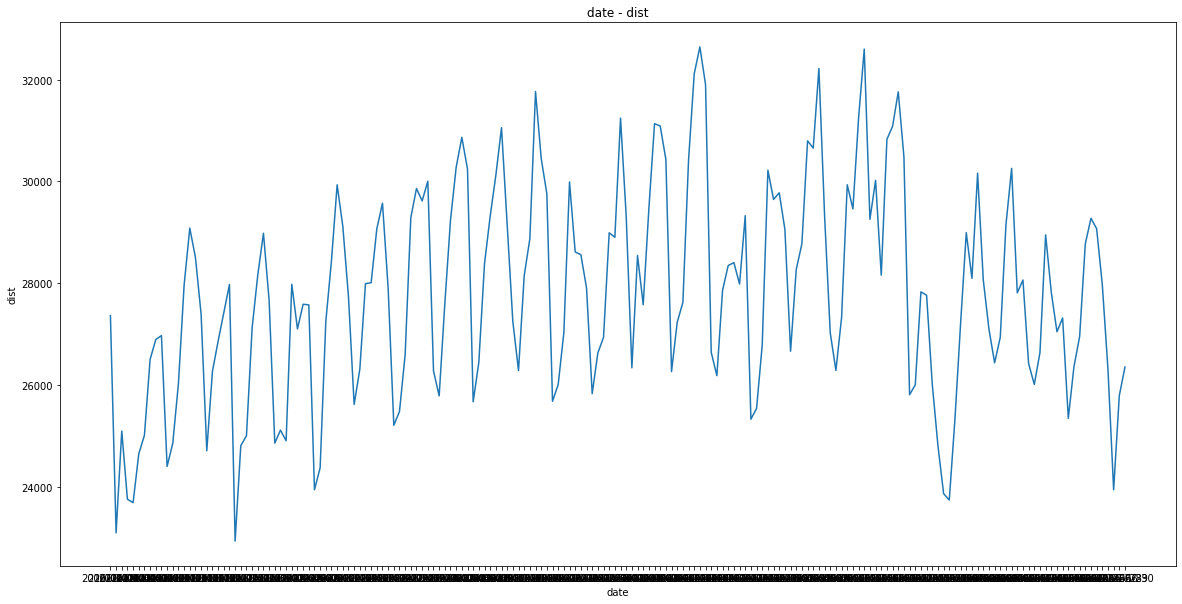

In [85]:
fig, ax = plt.subplots(1,1, figsize=(20, 10))

# 날자별 탑승 거리 
dateDist_drop = train_drop['dist'].groupby(train_drop.pickup_datetime.dt.strftime('%Y-%m-%d')).sum()

ax.set_title('date - dist')
ax.set_xlabel('date')
ax.set_ylabel('dist')
ax.plot(dateDist_drop)

plt.show()

## 클러스터링
### 지역 클러스터: 경도/위도
-> 거리 
### 시간 클러스터: 픽업시간 시간 
-> 요일(평일/주말(공휴일)))

=> 클러스터링 결과로?
1) 클러스터로 묶어서 레코드를 추가할 수도 있고
2) 클러스터끼리 학습할 수도 있을것 같고

In [ ]:
InteractiveShell.ast_node_interactivity = "all"